### Problem Set 2:
   Tom Curran
   
   MAC30100 Winter 2018
   
   January 22, 2018
#### Question 1
Some income data, lognormal distribution, and hypothesis testing (6 points). For this problem, you will use 200 data points of annual incomes of students who graduated in 2018, 2019, and 2020 from the University of Chicago M.A. Program in Computational Social Science. These data are in a single column of the text file incomes.txt in the PS2 folder. Incomes are reported in U.S. dollars. For this exercise, you will need to use the log normal distribution.

$$f(x | \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}} * e^{(-\frac{[ln(x)-\mu]^2}{2\sigma^2})} $$

The function $f(x|\mu, \sigma^2)$ is a probability density function in that $f(x|\mu, \sigma^2)>0$for all x and  $f(x|\mu, \sigma^2) = 1$. Note that $x$ must be nonnegative in the lognormal distribution and σ must be strictly positive.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as sts

incomes = pd.read_csv("incomes.txt",header = None).rename(columns = {0:"Income"})

income = incomes.Income

incomes.describe()

,Income
count,200.000000
mean,87588.930769
std,18081.166388
min,49278.801938
25%,74088.607447
50%,85801.697366
75%,100102.725206
max,135865.026796


a) Plot a histogram of percentages of the income.txt data with 30 bins. Make sure that the bins are weighted using the normed=True option. Make sure your plot has correct x-axis and y-axis labels as well as a plot title.

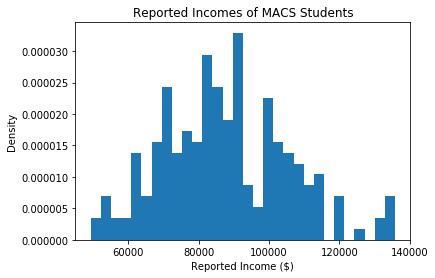

In [2]:
plt.hist(incomes.Income, bins = 30, normed = True)
plt.title("Reported Incomes of MACS Students")
plt.xlabel(r"Reported Income (\$)")
plt.ylabel('Density')

b) Plot the lognormal PDF f(x|μ = 11.0,σ = 0.5) for 0 ≤ x ≤ 150,000. What is the value of the log likelihood value for this parameterization of the distribution and given this data?

In [3]:
#define the lognorm pdf function using formula provided

def lognormpdf(x, sigma, mu, cutoff):
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
    pdf = (1/(x*sigma*np.sqrt(2*np.pi))) * np.exp( - ((np.log(x)- mu)**2)/(2*sigma**2))/prob_notcut
    return(pdf)

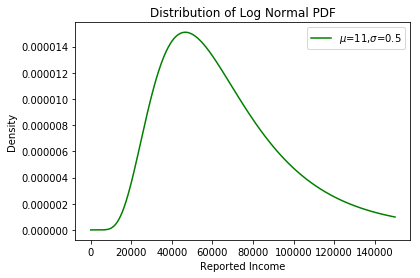

In [4]:
#create simulated points to simulate the mean and sd

x_sim = np.linspace(0.01, 150000, 500)

mu_1 = 11
sigma_1 = .5
cutoff = 150000
pdf_x_sim = lognormpdf(x_sim,sigma_1,mu_1,cutoff)
plt.plot(x_sim, pdf_x_sim, color = "g", label='$\mu$=11,$\sigma$=0.5')
plt.title("Distribution of Log Normal PDF")
plt.xlabel("Reported Income")
plt.ylabel("Density")
plt.legend(loc = "upper right")

In [5]:
#create and print out the log likelihood values:

def log_likelihood(x, sigma, mu, cutoff):
    pdf = lognormpdf(x, sigma, mu, cutoff)
    ln_pdf = np.log(pdf)
    ln_pdf_sum = ln_pdf.sum()
    
    return ln_pdf_sum

incomes_log_likelihood = log_likelihood(incomes, sigma_1,mu_1,cutoff)
print("Log Likelihood of Sigma = ", sigma_1," and mu = ", mu_1,":",incomes_log_likelihood)


Log Likelihood of Sigma =  0.5  and mu =  11 : Income   -2385.856998
dtype: float64


c) Estimate the parameters of the lognormal distribution by maximum likeli- hood and plot its PDF against the PDF from part (b) and the histogram from part (a). Plot the estimated PDF for 0 ≤ x ≤ 150, 000. Report the ML estimates for μ and σ, the value of the likelihood function, and the variance-covariance matrix.

In [6]:
def crit(params, *args):
    
    sigma = params[0]
    mu = params[1]
    x, cutoff = args
    log_lik_val = log_likelihood(x, sigma, mu, cutoff)
    neg_log_lik_val = -log_lik_val 
    return(neg_log_lik_val)

In [7]:
mu_init = mu_1

sigma_init = sigma_1

params_init = np.array([sigma_init, mu_init])

x_init = income 

cutoff_init = cutoff

mle_args = (x_init, cutoff_init)

results = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',bounds=((0.1, None), (0.1, None)))
print(results)

      fun: 2241.719301368661
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01118678,  0.00650289])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 10
   status: 0
  success: True
        x: array([  0.20817854,  11.35902441])


In [8]:
mle_sigma, mle_mu = results.x
print("Maximum Likelihood Estimate Sigma = ", mle_sigma)
print("Maximum Likelihood Estimate Mu = ", mle_mu)

Maximum Likelihood Estimate Sigma =  0.208178536649
Maximum Likelihood Estimate Mu =  11.3590244074


#### Variance Covariance Matrix:

In [9]:
results
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('Variance Covariance Matrix for MLE Values = ', vcv_mle)
print('Standard error for mu mle estimate = ', stderr_mu_mle)
print('Standard error for sigma mle estimate = ', stderr_sig_mle)

Variance Covariance Matrix for MLE Values =  [[ 0.00010283 -0.00010283]
 [-0.00022522  0.00022522]]
Standard error for mu mle estimate =  0.0101407002914
Standard error for sigma mle estimate =  0.0150073128909


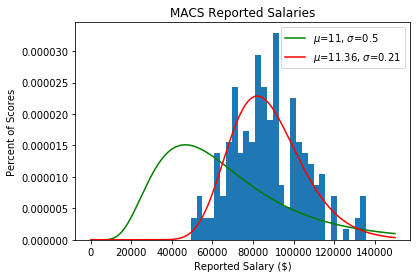

In [10]:
mle_x_sim = lognormpdf(x_sim, mle_sigma, mle_mu, cutoff)

plt.hist(incomes.Income, bins=30, normed = True)
plt.plot(x_sim, pdf_x_sim, color = "g", label='$\mu$=11, $\sigma$=0.5')
plt.plot(x_sim, mle_x_sim, color = "r", label='$\mu$=11.36, $\sigma$=0.21')
plt.title("MACS Reported Salaries")
plt.xlabel("Reported Salary (\$)")
plt.ylabel("Percent of Scores")
plt.legend(loc = "upper right")

d) Perform a likelihood ratio test to determine the probability that the data in incomes.txt came from the distribution in part (b).

In [11]:
mle_log_likelihood = log_likelihood(incomes, mle_sigma, mle_mu, cutoff)
print("Log Likelihood of Sigma = ", sigma_1," and mu = ", mu_1,":",incomes_log_likelihood)
print('------------------------------------------------------------------')
print("Log Likelihood of Sigma = ", mle_sigma," and mu = ", mle_mu,":",mle_log_likelihood)

null_log_likely = incomes_log_likelihood
alt_log_likely = mle_log_likelihood

sig_lvl = 2 * (alt_log_likely - null_log_likely)

pval_null = 1.0 - sts.chi2.cdf(sig_lvl, 2)
print('------------------------------------------------------------------')
print('Null Hypothesis chi-squared p-value = ', pval_null)



Log Likelihood of Sigma =  0.5  and mu =  11 : Income   -2385.856998
dtype: float64
------------------------------------------------------------------
Log Likelihood of Sigma =  0.208178536649  and mu =  11.3590244074 : Income   -2241.719301
dtype: float64
------------------------------------------------------------------
Null Hypothesis chi-squared p-value =  [ 0.]


e) With your estimated distribution of incomes for Chicago MACSS students from part (c), you now have a model for what your own income might look like when you graduate. Using that estimated model from part (c), What is the probability that you will earn more than \$100,000? What is the probability that you will earn less than \$75,000?

In [12]:
salary1 =  1 - sts.lognorm.cdf(100000, scale = np.exp(mle_mu), s = mle_sigma)
salary2 = sts.lognorm.cdf(75000, scale = np.exp(mle_mu), s = mle_sigma)

print("Probability of salary greater than $100000: ", str(round(salary1,4)*100)+'%')
print('------------------------------------------------------------------')
print("Probability of salary less than $75000: ", str(round(salary2,4)*100)+'%')



Probability of salary greater than $100000:  22.99%
------------------------------------------------------------------
Probability of salary less than $75000:  26.02%
